In [1]:
# Predicting whether the bank customer will do a deposit or not.

# Building a model
# Using GridSearchCV to find the Best Parameters

# Import the required libraries

In [2]:
import time
import pandas as pd
from sklearn import preprocessing  # for LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

## Read the Data from the CSV

In [4]:
dummy_df = pd.read_csv('bank.csv')

In [5]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
dummy_df.isnull().sum().any() # no null values in df

False

In [7]:
dummy_df.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [8]:
dummy_df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [9]:
dummy_df.pdays.unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [10]:
dummy_df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [11]:
dummy_df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [12]:
dummy_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Pre-Processing

In [13]:
def preprocessor(df):
    
    # Modifications to the data or indices of res_df will not be reflected in df
    # shallow copy, use deep=False
    res_df = df.copy() # by default, deep copy. 
    
    le = preprocessing.LabelEncoder() # sklearn.preprocessing
    
    # categical variables are converted to numerical variables
    # Encode labels with value between 0 and n_classes-1.
    # ordinal encoding 
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
#     print(res_df['deposit']) # one whole column with deposit values as 0 0r 1
    return res_df              

In [14]:
encoded_df = preprocessor(dummy_df)

In [15]:
encoded_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1


In [16]:
x = encoded_df.drop(['deposit'],axis=1).values  # axis = {0 or 'index', 1 or 'columns'}, default 0
y = encoded_df['deposit'].values

## Split the data into Train-Test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [18]:
# Decision tree
model_dt = DecisionTreeClassifier(random_state=1)

In [19]:
model_dt.fit(x_train, y_train) 

DecisionTreeClassifier(random_state=1)

## Hyper-Parameter Optimization using GridSearchCV

In [20]:
start = time.time()

param_dict = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf' : [2, 3, 7, 8, 10],
              'min_samples_split': [5, 10, 15, 20, 50, 100],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_rf.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 50}
Time taken in grid search:  643.22


In [44]:
cv_rf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=7,
                       min_samples_split=100, random_state=1)

In [21]:
# Decision tree using Best Parameters returned by GridSearchCV
model_dt.set_params(criterion = 'gini',
                  max_features = None, # all features are considered 
                  max_depth = 15,
                    min_samples_leaf = 8, 
                    min_samples_split = 100)

model_dt.fit(x_train, y_train)
model_dt_2_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8532870422219734
Testing score:  0.8347514554411106


In [22]:
# Running GridSearchCV again with a different set of parameters
start = time.time()
param_dict = {'max_depth': [ 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf' : [1, 2, 3, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 50, 90, 95, 100, 105],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_rf.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 95}
Time taken in grid search:  5143.73


In [23]:
# Decision tree using Best Parameters returned by GridSearchCV
model_dt.set_params(criterion = 'gini',
                  max_features = None, # all features are considered 
                  max_depth = 13,
                    min_samples_leaf = 8, 
                    min_samples_split = 105)

model_dt.fit(x_train, y_train)
model_dt_2_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8532870422219734
Testing score:  0.8347514554411106


In [24]:
# Running GridSearchCV again with a different set of parameters
start = time.time()
param_dict = {'max_depth': [ 12, 13, 14, 15, 16, 17],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf' : [6, 7, 8, 9, 10],
              'min_samples_split': [90, 95, 100, 101, 102, 103, 104, 105, 106, 107],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_rf.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 95}
Time taken in grid search:  908.41


In [25]:
# Decision tree using Best Parameters returned by GridSearchCV
model_dt.set_params(criterion = 'gini',
                  max_features = None, # all features are considered 
                  max_depth = 13,
                    min_samples_leaf = 8, 
                    min_samples_split = 101)

model_dt.fit(x_train, y_train)
model_dt_2_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

# INSIGHTS
# best accuracy obtained using GridSearchCV

Training score:  0.8532870422219734
Testing score:  0.8347514554411106


# Dropping poutcome, to see whether it will improve scores

In [26]:
# poutcome is highly correlated with pdays, so just trying whether dropping poutcome will improve accuracy scores

In [27]:
encoded_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


<AxesSubplot:>

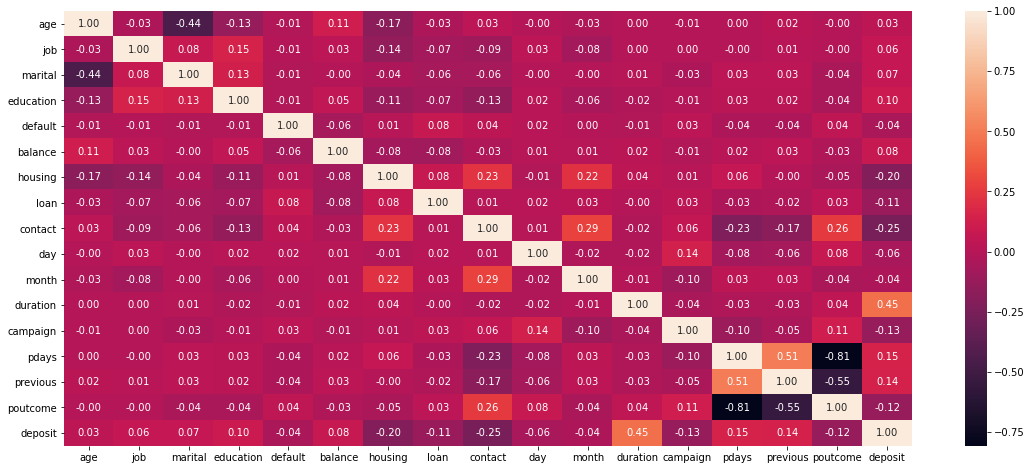

In [28]:
plt.subplots(figsize=(19,8))
sns.heatmap(encoded_df.corr(),fmt='.2f',annot=True)

In [29]:
encoded_df.pdays.var(), encoded_df.poutcome.var()

(11828.363897492869, 1.005912541561385)

In [30]:
encoded_df.drop(['poutcome'],axis=1, inplace=True)
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,1


<AxesSubplot:>

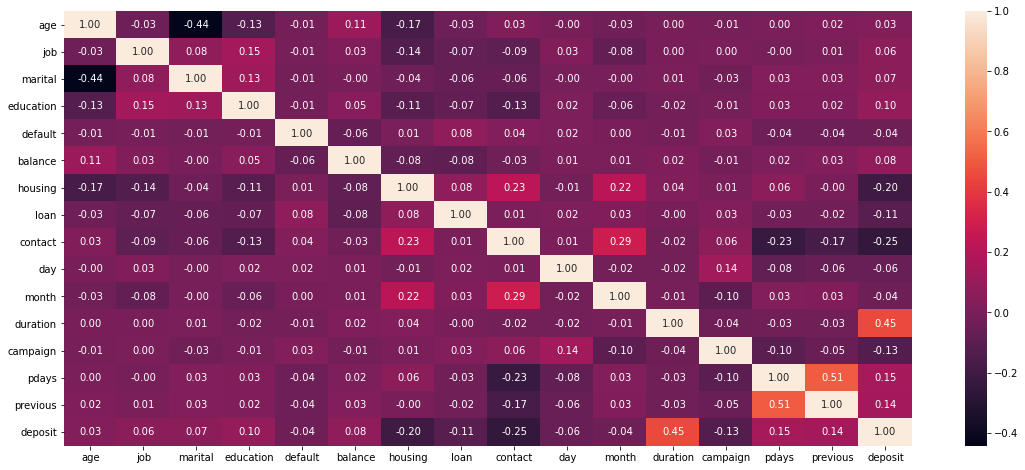

In [31]:
plt.subplots(figsize=(19,8))
sns.heatmap(encoded_df.corr(),fmt='.2f',annot=True)

In [32]:
x = encoded_df.drop(['deposit'],axis=1).values  # axis = {0 or 'index', 1 or 'columns'}, default 0
y = encoded_df['deposit'].values

## Split the data into Train-Test

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [34]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
encoded_df['deposit'].value_counts(normalize=True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [36]:
encoded_df['deposit'].values.mean() # 47.38% rows are deposit=1

0.4738398136534671

In [37]:
print(      "train dataset Revenue Grid mean:",round(y_train.mean(),3))
print("test dataset Revenue Grid mean:", round(y_test.mean(),3))

train dataset Revenue Grid mean: 0.476
test dataset Revenue Grid mean: 0.464


## Build the Decision Tree Model

In [38]:
# Decision tree
model_dt = DecisionTreeClassifier(random_state=1)

In [39]:
# Decision tree using Best Parameters returned by GridSearchCV
model_dt.set_params(criterion = 'gini',
                  max_features = None, # all features are considered 
                  max_depth = 15,
                    min_samples_leaf = 8, 
                    min_samples_split = 100)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=8, min_samples_split=100,
                       random_state=1)

In [40]:
model_dt.fit(x_train, y_train)
model_dt_2_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)


# INSIGHTS
# before dropping 'poutcome', scores were:
# Training score:  0.8539590099675216
# Testing score:  0.8266905508284819

Training score:  0.8479113002575877
Testing score:  0.825347066726377


## Hyper-Parameter Optimization using GridSearchCV

In [41]:
start = time.time()

param_dict = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_samples_leaf' : [2, 3, 7, 8, 10],
              'min_samples_split': [5, 10, 15, 20, 50, 100],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_dt, 
                     cv = 10, #K-fold cross validation
                     param_grid=param_dict, 
                     n_jobs =1 ) # Number of jobs to run in parallel. 
                    # when n_jobs set to -1, all CPUs are used

cv_rf.fit(x_train, y_train) 
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 100}
Time taken in grid search:  32794.41


In [42]:
# Decision tree using Best Parameters returned by GridSearchCV
model_dt.set_params(criterion = 'entropy',
                  max_features = None, # all features are considered 
                  max_depth = 15,
                    min_samples_leaf = 3, 
                    min_samples_split = 100)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=100, random_state=1)

In [43]:
model_dt.fit(x_train, y_train)
model_dt_2_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8576548325680368
Testing score:  0.8307210031347962


In [45]:
# INSIGHTS
# dropping the poutcome column didnt increase the accuracy.
# accuracy reduced from 83.475 to 83.072

In [48]:
round(83.475,1)

83.5